In [1]:
import requests
from IPython.core.display import HTML

# Activation functions and loss functions
This exercise is about activation- and loss functions for neural architectures. The architecture of an NN offers endless variations and customization possibilities for defining (families of) prediction functions, making it impractical to exhaustively test every possible option for a given problem. Consequently, developing an intuition of how different architectural choices, parameters, and hyperparameters impact the performance of the network is essential. 

**Important**
Most of the code is provided, with only a few adjustments left to complete, it is however important for you to reflect on the outcomes and **relate them to the theory**.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#activation">Task 1: Implement activation functions</a>
            </li>
            <li>
            <a href="#activation1">Task 2: Experiment with activation functions</a>
            </li>
            <li>
            <a href="#activation2">Task 3: Evaluate</a>
            </li>
            <li>
            <a href="#loss">Task 4: Implement loss functions</a>
            </li>
            <li>
            <a href="#loss1">Task 5: Visualizing loss functions</a>
            </li>
            <li>
            <a href="#loss2">Task 6: Experiment with loss functions</a>
            </li>
            <li>
            <a href="#loss3">Task 7: Evaluate</a>
            </li>
            <li>
            <a href="#loss4">Task 8: Custom loss functions</a>
            </li>
        </ul>
    </div>
</article>

## Activation Functions
This exercise is about the importance of selecting an appropriate activation function. Activation functions are crucial for introducing non-linearity into neural architectures. Each activation function has its unique characteristics and trade-offs and can significantly influence the model’s predictive capability, impacting its performance, convergence behavior, and the complexity of tasks it can effectively address.
This exercise explores activation functions for:
**Classification:**
- Sigmoid: Commonly used in binary classification tasks, the sigmoid function maps input values to a number between 0 and 1. However, it can suffer from so-called vanishing gradient problems, occurring in deeper networks.

- Hyperbolic Tangent (tanh): maps inputs to the range between -1 and 1 and addresses some of the shortcomings of the sigmoid function in terms of vanishing gradients.

- Softmax: is a generalization of the logistic function, commonly used for the output layer of multi-class classification networks, converting raw inputs into probabilities across multiple classes.


**Regression:**
- Rectified Linear Unit (ReLU): ReLU introduces non-linearity while maintaining computational efficiency. It helps mitigate vanishing gradient issues but may encounter "dead neurons" due to zero gradients for negative inputs.

- Leaky ReLU: addresses the "dying ReLU" problem by allowing a small, non-zero gradients for negative inputs, maintaining active neurons during training.

- Exponential Linear Unit (ELU): similar to ReLU for positive inputs, ELU applies an exponential function to negative values, ensuring smoother gradients and reducing the risk of “dead neurons” during trainin



---
**Task 1 (medium): Implement activation functions👩‍💻**
1. Use the `torch`
 library to implement the activation functions defined in the cell below. 


**Activation functions**
**Linear**

$$
f(x) = x
$$
**Sigmoid**

$$
f(x) = \frac{1}{1 + e^{-x}}
$$
**ReLU**

$$
f(x) = \max(0, x)
$$
**Leaky ReLU**

$$
f(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0 
\end{cases}
$$
**Tanh**

$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
**ELU**

$$
f(x) = \begin{cases} 
x & \text{for } x \geq 0 \\
\alpha \left( e^x - 1 \right) & \text{for } x < 0
\end{cases}
$$



---

In [2]:
import torch

def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def relu(x):
    return torch.clamp(x, min=0)

def leaky_relu(x, alpha=0.01):
    return torch.where(x > 0, x, alpha * x)

def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

def elu(x, alpha=1.0):
    return torch.where(x >= 0, x, alpha * (torch.exp(x) - 1))


## Applying activation functions to neural networks
<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="make_moons">

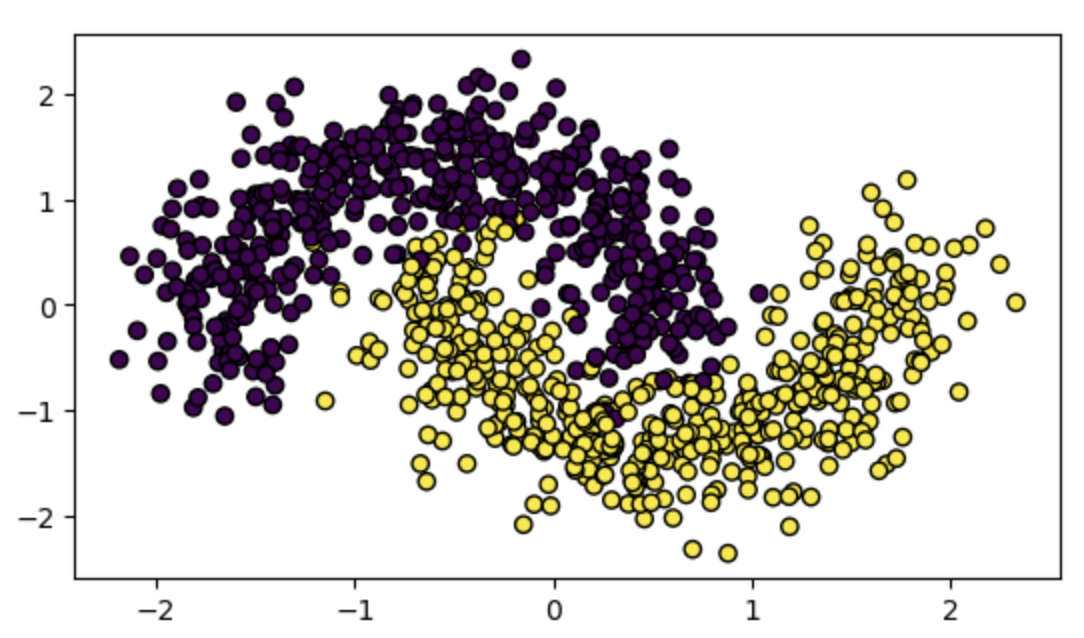

<figcaption class="figure-caption has-text-center">Figure 1: Example of the synthetic data generated by the `make_moons`
 function.
</figcaption>
</figure>
</div>


</div>

The `make_moons`
 function from the [Scikit-Learn Library](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)
 is used to generate synthetic data. The function generates two classes to be separated as shown in [Figure 1](#make_moons). The following tasks will apply the activation functions for the classification problem to:
- train neural networks (NNs), 
- evaluate their effects on performance, focusing on accuracy, convergence speed, and computational efficiency.

The NN defined in the cell below uses functions and classes defined in the following files:
- `networks.py`
: Contains the `SimpleNN`
 network implementation.
- `trainers.py`
: contains the `train`
 function used for training.
- `metrics.py`
: contains the `evaluateNN`
 function for evaluation and visualization.


---
**Task 2 (medium): Experiment with activation functions👩‍💻**
1. Examine the files and gain an overview of the architecture of the NN and the training loop. 

2. Run the cell below to train and visualize the performance of the models with the different activations functions.



---

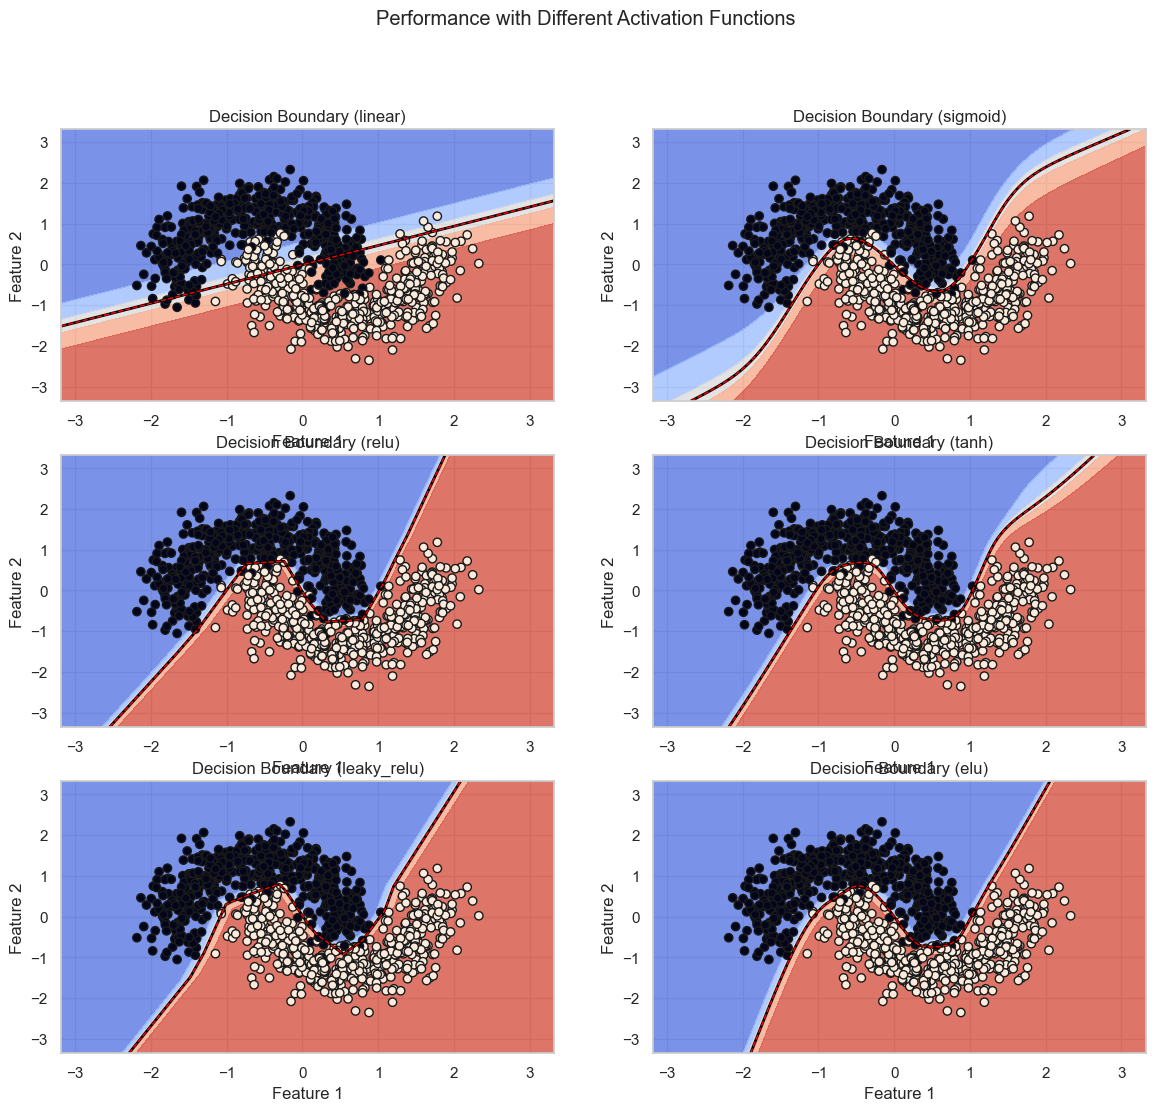

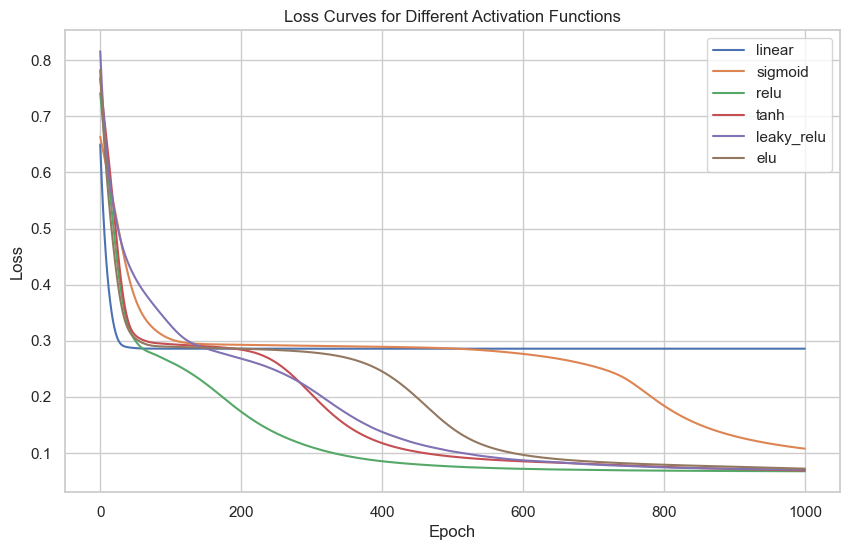

Activation: linear, Test Accuracy: 0.86, Training Time: 1.06 seconds
Activation: sigmoid, Test Accuracy: 0.98, Training Time: 1.91 seconds
Activation: relu, Test Accuracy: 0.99, Training Time: 1.37 seconds
Activation: tanh, Test Accuracy: 0.98, Training Time: 1.58 seconds
Activation: leaky_relu, Test Accuracy: 0.97, Training Time: 1.88 seconds
Activation: elu, Test Accuracy: 0.98, Training Time: 1.56 seconds


In [7]:
from torch import optim
from torchvision import transforms
from trainers import *
from networks import *
from metrics import *

X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor,X_train, X_test, y_train, y_test, X, y  = get_data()
# Activation functions to test
activation_functions = {
    'linear': linear,
    'sigmoid': sigmoid,
    'relu': relu,
    'tanh': tanh,
    'leaky_relu': leaky_relu,
    'elu': elu
}

results = {}

for name, activation in activation_functions.items():
    model, train_losses, accuracy, training_time, decision_threshold = train(SimpleNN(activation=activation), name, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, X_train, X_test, y_train, y_test, epoch=1000 )
    # Store results
    results[name] = {
        'model': model,
        'train_losses': train_losses,
        'accuracy': accuracy,
        'training_time': training_time
    }

evaluateNN(results, X, y)


---
**Task 3 (medium): Evaluate👩‍💻💡**
1. Evaluate the performance of the models based on the activation functions used. Analyze the results using the plots and relate them to theoretical concepts to interpret the outcomes.
2. Evaluate the activation functions in terms of computational efficiency and their suitability for the given problem. Explain which activation function is preferred and justify the choice.
3. Rerun the experiment by increasing the number of epochs to 1000. Investigate the training curves and analyze the results. Discuss why some activation functions cause the learning  to plateau before eventually converging to a smaller loss?


---

# Task 3 Reflections


## Reflection with 300 epochs

| **Activation Function** | **Test Accuracy** | **Training Time (seconds)** | **Nature**                                                                                      | **Advantages**                                                                                         | **Issues**                                                                                             | **Result**                                                                                             |
|--------------------------|-------------------|-----------------------------|------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Linear**              | 0.86             | 0.56                        | Does not introduce non-linearity.                                                             | Simple to compute.                                                                                    | Limited ability to capture complex patterns; behaves like a linear classifier.                         | Lower accuracy due to limited pattern-capturing ability.                                               |
| **Sigmoid**             | 0.87             | 0.88                        | Maps inputs to the range (0, 1).                                                              | Smooth gradient in small input range.                                                                 | Vanishing Gradient Problem: Gradients diminish for large input magnitudes, slowing learning.           | Slower learning and moderate accuracy due to inefficient gradient flow.                                |
| **ReLU**                | 0.96             | 0.61                        | Outputs zero for negative inputs and linear for positive inputs.                              | Computationally efficient; mitigates vanishing gradient for positive inputs.                           | Susceptible to Dying ReLU Problem: Neurons can become inactive with all outputs as zero.               | Highest test accuracy due to effective learning of non-linear relationships.                           |
| **Tanh**                | 0.97             | 0.73                        | Maps inputs to the range (-1, 1).                                                             | Zero-centered output, which can lead to faster convergence.                                            | Vanishing Gradient Problem: Similar to sigmoid in saturation regions.                                  | High accuracy due to effective representation of non-linear patterns.                                  |
| **Leaky ReLU**          | 0.97             | 0.75                        | Allows a small, non-zero gradient for negative inputs.                                        | Addresses Dying ReLU Problem; keeps neurons active.                                                    | Slightly more computationally expensive than ReLU.                                                     | High accuracy, slightly below ReLU; better gradient flow for all input ranges.                         |
| **ELU**                 | 0.89             | 2.04                        | Exponential behavior for negative inputs; smooth transition around zero.                     | Smoother gradient transition; may help convergence in certain architectures.                          | Higher computational cost; less commonly used due to moderate benefits compared to alternatives.       | Moderate accuracy and longest training time; may help specific architectures but less suitable here.   |

---

### Recommendations and Analysis:

1. **Preferred Activation Function:** `ReLU` and `Tanh` achieve the best balance of accuracy and training time. While `Tanh` achieves slightly better test accuracy, `ReLU` is computationally simpler and is less prone to vanishing gradients.


## Reflection with 1000 epochs

# Task 3 Evaluation Table (1000 Epochs)

| **Activation Function** | **Test Accuracy** | **Training Time (seconds)** |
|--------------------------|-------------------|-----------------------------|
| **Linear**              | 0.86             | 1.06                        |
| **Sigmoid**             | 0.98             | 1.91                        |
| **ReLU**                | 0.99             | 1.37                        |
| **Tanh**                | 0.98             | 1.58                        |
| **Leaky ReLU**          | 0.97             | 1.88                        |
| **ELU**                 | 0.98             | 1.56                        |



   - Some activation functions like `Sigmoid` and `Tanh` cause the learning curve to plateau before eventually converging to a smaller loss due to the **vanishing gradient problem** in saturation regions.
   - `ReLU` and `Leaky ReLU` maintain better gradient flow, resulting in faster convergence and lower final loss.
   - `ELU` may show better results in certain architectures due to its smooth gradient transition, but it is computationally more expensive for this dataset.
---


## Loss Functions
The loss function evaluates how closely the model’s predictions match the true labels and guides the adjustment of model parameters during training. Different types of problems require specific loss functions. Therefore, understanding the data and the problem is crucial for selecting or designing the most suitable loss function for training the network.
This exercise explores the impact of the following loss functions:

**Classification**
- Binary Cross Entropy (BCE)

**Regression**
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)


---
**Task 4 (medium): Implement loss functions👩‍💻**
1. Implement the loss functions defined below using the `torch`
 library.


**Loss functions**
Let:
- $ y_i $ be the true value of the $i$-th sample in the training set, 
- $ N $ be the number of samples.

Define:
**Mean Squared Error (MSE)**

$$
\text{MSE}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$
where $ \hat{y}_i $ is the predicted value of the $i$-th sample in the training set.
**Mean Absolute Error**

$$
\text{MAE}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|
$$
where $ \hat{y}_i $ is the predicted value of the $i$-th sample in the training set.. 
**Binary Cross-Entropy Loss (BCE)**

$$
\text{BCE}(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$
where $ \hat{y}_i $ is the predicted probability of the $i$-th sample in the training set.


---

In [4]:
# Custom Binary Cross-Entropy Loss Function
class BCE_Loss(nn.Module):
    def __init__(self):
        super(BCE_Loss, self).__init__()

    def forward(self, outputs, targets):
        epsilon = 1e-12
        outputs = torch.clamp(outputs, min=epsilon, max=1 - epsilon)
        bce = - (targets * torch.log(outputs) + (1 - targets) * torch.log(1 - outputs))
        return bce.mean()

# Custom Mean Squared Error Loss Function
class MSE_Loss(nn.Module):
    def __init__(self):
        super(MSE_Loss, self).__init__()

    def forward(self, outputs, targets):
        return ((outputs - targets) ** 2).mean()

# Custom Mean Absolute Error Loss Function
class MAE_Loss(nn.Module):
    def __init__(self):
        super(MAE_Loss, self).__init__()

    def forward(self, outputs, targets):
        return torch.abs(outputs - targets).mean()



---
**Task 5 (medium): Visualizing loss functions👩‍💻**
1. Complete the cell below to visualize the  `BCE`
, `MSE`
 and `MAE`
 loss functions when applied to a synthetic binary classification problem. Use the implemented loss functions, the true labels and the `linspace`
 in a for loop, to plot the loss functions.
2. Use the plots and the definitions of the loss functions to argue why `BCE`
 is preferred for classification problems. 


---

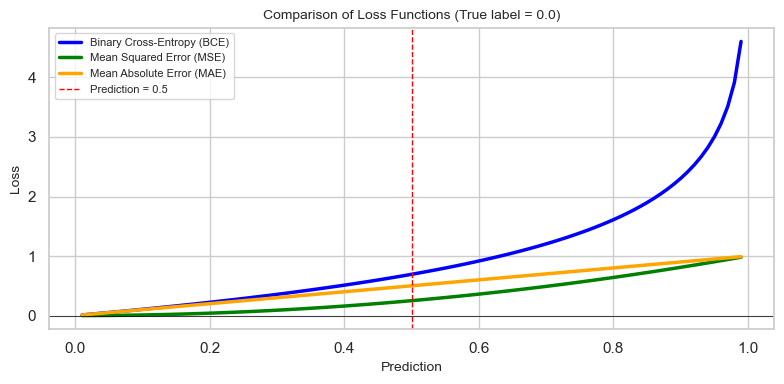

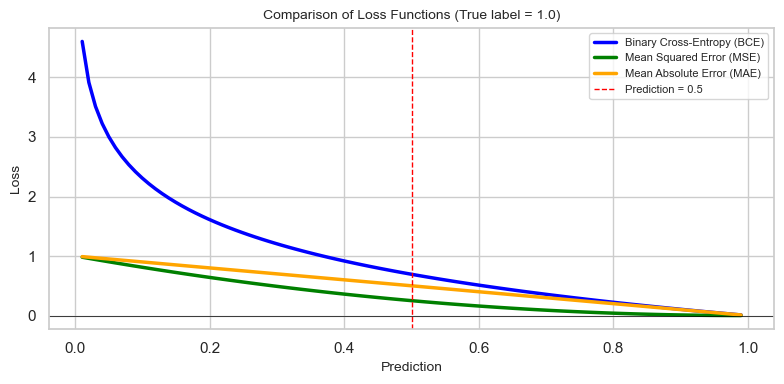

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the loss functions
bce_loss = BCE_Loss()
mse_loss = MSE_Loss()
mae_loss = MAE_Loss()

# True labels to consider
y_true_values = [0.0, 1.0]  # True labels 0 and 1

# Range of predictions
predictions = torch.linspace(0.01, 0.99, 100).unsqueeze(1)  # Reshape to match expected input shape

# Set Seaborn style
sns.set(style="whitegrid")

for y_true_value in y_true_values:
    y_true = torch.full_like(predictions, y_true_value)  # Broadcast y_true to match predictions
    
    # Compute loss values
    bce_values = [bce_loss(torch.tensor([p]), torch.tensor([y_true_value])).item() for p in predictions]
    mse_values = [mse_loss(torch.tensor([p]), torch.tensor([y_true_value])).item() for p in predictions]
    mae_values = [mae_loss(torch.tensor([p]), torch.tensor([y_true_value])).item() for p in predictions]
    
    # Create a DataFrame for plotting
    import pandas as pd
    data = pd.DataFrame({
        'Prediction': predictions.squeeze().numpy(),
        'Binary Cross-Entropy (BCE)': bce_values,
        'Mean Squared Error (MSE)': mse_values,
        'Mean Absolute Error (MAE)': mae_values
    })

    # Plot the loss functions
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=data, x='Prediction', y='Binary Cross-Entropy (BCE)', color='blue', label='Binary Cross-Entropy (BCE)', linewidth=2.5)
    sns.lineplot(data=data, x='Prediction', y='Mean Squared Error (MSE)', color='green', label='Mean Squared Error (MSE)', linewidth=2.5)
    sns.lineplot(data=data, x='Prediction', y='Mean Absolute Error (MAE)', color='orange', label='Mean Absolute Error (MAE)', linewidth=2.5)

    # Add labels, title, and legend
    plt.title(f'Comparison of Loss Functions (True label = {y_true_value})', fontsize=10)
    plt.xlabel('Prediction', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0.5, color='red', linestyle='--', linewidth=1.0, label='Prediction = 0.5')
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Task 5 reflection

**Use the plots and the definitions of the loss functions to argue why `BCE` is preferred for classification problems.** 

BCE uses propabilities. Punishing predictions far off, meaning:
- Label is 1, prediction is 0.9, loss is = 0.2
- label is 1, prediction is 0.1, loss is = 2,5

MAE/MSE just uses raw values, and doesn't understand that 0,2 is actually quite far away from 1.0, and thus should be punished proportionally.

The next step is about using the loss functions for training a neural network on the same classification task as before and to show the impact of the loss functions on performance metrics, such as accuracy, precision, recall and F1 score.
For this task, the `evaluateNN2`
 function in the `metrics.py`
 file will be used. Note the noise parameter in the `get_data`
 function and the `decision_threshold`
 in the `train`
 function.

---
**Task 6 (medium): Experiment with loss functions💡**
1. Run the cell below to train and visualize the performance of the network with the different loss functions.
2. Compare the results to the previous tasks and relate them to theory. 


---

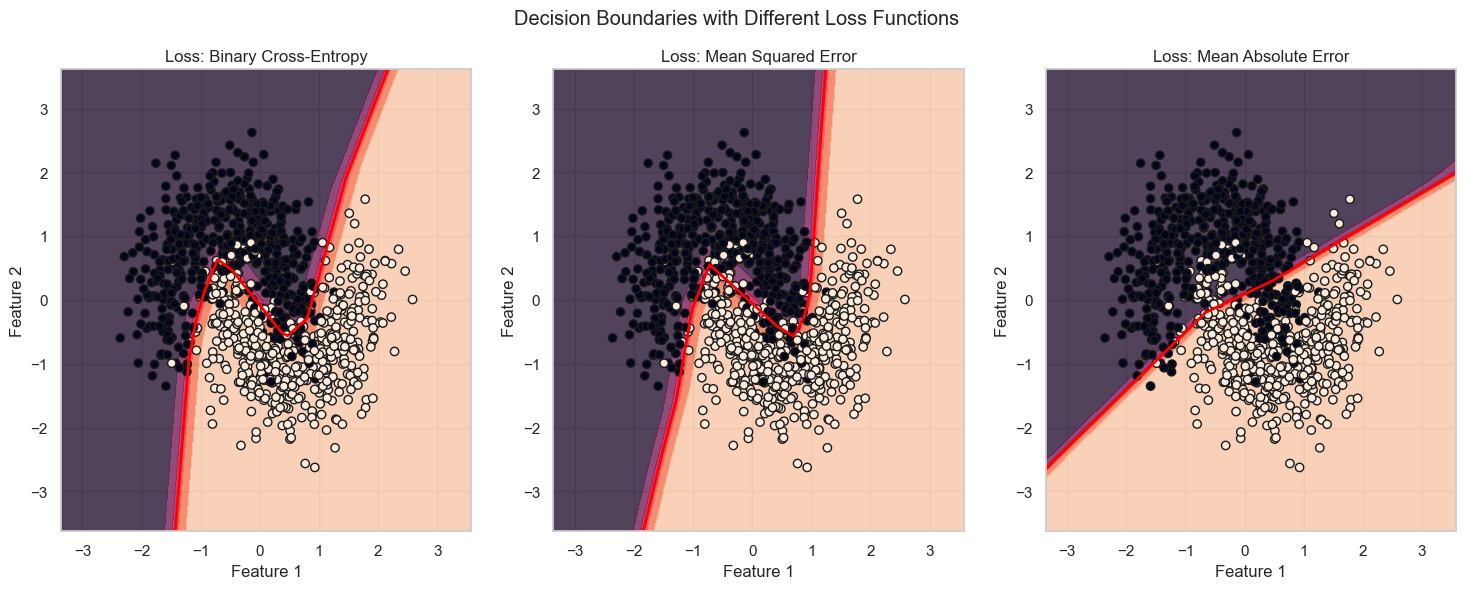

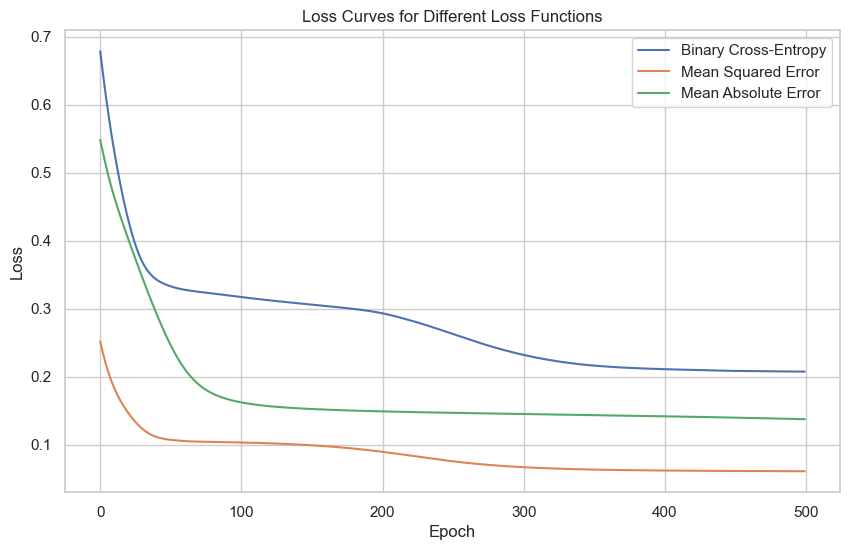

Loss: Binary Cross-Entropy, Test Accuracy: 0.92, Precision: 0.95, Recall: 0.88, F1 Score: 0.91
Loss: Mean Squared Error, Test Accuracy: 0.90, Precision: 0.94, Recall: 0.84, F1 Score: 0.89
Loss: Mean Absolute Error, Test Accuracy: 0.83, Precision: 0.83, Recall: 0.85, F1 Score: 0.84


In [16]:
from torch import optim
from torchvision import transforms
from trainers import *
from networks import *
from metrics import *


X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor,X_train, X_test, y_train, y_test, X, y  = get_data(0.3)

# Define loss functions to test
loss_functions = {
    'Binary Cross-Entropy': BCE_Loss(),
    'Mean Squared Error': MSE_Loss(),
    'Mean Absolute Error': MAE_Loss()
}

results = {}

#Threshold example: if probability is 0.5 or more then 1 else 0
for name, loss in loss_functions.items():
    model, train_losses, accuracy, training_time, decision_threshold = train(SimpleNN(activation=relu), name, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, X_train, X_test, y_train, y_test, 500, loss=loss, decision_threshold=0.6 )
    # Store results
    results[name] = {
        'model': model,
        'train_losses': train_losses,
        'accuracy': accuracy,
        'training_time': training_time,
        'decision_threshold': decision_threshold
    }

evaluateNN2(results, X, y, X_test_tensor, y_test)


---
**Task 7 (medium): Evaluate💡**
1. Use the plots to evaluate the performance of the different loss functions and incorporate theoretical concepts to interpret the results.

2. Explain why MSE and MAE losses may achieve lower final loss values, while BCE delivers comparable or superior accuracy for the classification task. Discuss the distinct characteristics of each loss function and how they relate to classification performance.

3. Experiment with the noise parameter and explain its impact on accuracy. Relate your explanation to the findings from [Task 5](#loss1).

4. Modify the decision threshold and analyze its impact on the results. Address the following questions:
    - Explain a scenario where increasing the threshold might be beneficial, and support the reasoning with theory.
    - Explain a scenario where decreasing the threshold might be advantageous, and provide a theoretical justification.




---

## Task 7 reflection

## 1. Performance Evaluation Using Plots

**Final loss and metrics:**
- BCE and MSE had in this case almost identical results classification and F1-score etc, while MAE performed worse. 
- MAE doesn't punish predictions far off. Meaning it treats each probability as a raw value.

**Convergence speed**
- **BCE Loss** Converges slower, but is more accurate
- **MSE and MAE Losses** Converges faster, but is less accurate.

### Metrics Comparison with noise = 0.2 and threshold = 0.6:
| Loss Function         | Test Accuracy | Precision | Recall | F1 Score |
|-----------------------|---------------|-----------|--------|----------|
| **Binary Cross-Entropy** | **0.97**      | 0.98      | 0.96   | **0.97** |
| **Mean Squared Error**  | 0.97          | 0.98      | 0.96   | 0.97     |
| **Mean Absolute Error** | 0.88          | 0.90      | 0.86   | 0.88     |

## 2. Why BCE Outperforms MSE and MAE

BCE doesn't treat the errors as raw numbers, meaning that a prediction far off is given a high error due to the log function, such as 4,6 in error for a prediction totally off. Where as MSE and MAE doesn't treat the numbers as a probability and will give an error of 1, for a prediction totally off. As that number is lower, MSE and MAE will result in a lower "total loss", but that "total loss" isn't directly comparable to the "total loss" that BCE produces.
Thus BCE produces loss that relates to probability, which is used for classification.
MAE and MSE doesn't produce a loss that relates to probability, and is therefore less suitable for classification.

## 3. Impact of Noise on Accuracy

  - Noise increases overlap between classes, making it harder for the model to learn clear boundaries.
  - Noisy outliers, will generate a big prediction error for BCE, and much smaller errors with MSE and MAE. BCE might therefore be prone to overfitting noise.


## 4. Impact of Decision Threshold on Results

**Threshold meaning:** It is the minimum probability required to label something as true.

### High Threshold:
  - Useful when **precision** is more important than recall.
  - Example email spam. We only want absolutely certain that a spam mail goes to spam folder, and we don't put a important mail in spam.

### Small Threshold:
  - Useful when **recall** is more important than precision.
  - Example, detecting breast cancer. We want to make sure that all cases we even slightly think could be breast cancer, is detected.



---
**Task 8 (hard): Custom loss functions💡**
Consider the case of iris codes derived from an individual’s iris pattern. The codes are represented as binary vectors which is matched against a database of authorized codes to determine access. The Hamming Distance (HD) is commonly used as a similarity measure.

$$
HD(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} 
\begin{cases} 
1 & \text{if } x_i \neq y_i \\
0 & \text{if } x_i = y_i 
\end{cases}
$$
It calculates the number of positions with different values.
A neural network could potentially be trained to generate synthetic eye images embedding specific iris codes, potentially to gain unauthorized access to a system. It may seem logical to design a custom loss function based on the Hamming Distance, encouraging the network to generate patterns closely matching a target iris code. However, this approach is not valid for a loss function in the context of neural network training.
1. Argue why the HD is not a valid choice as loss function.


**Hint**
Incoorporate the formula of the HD and the nature of Gradient Decent in your discussion.


---

## Task 8: Why Hamming Distance is Not a Valid Loss Function


**Discrete Nature**:
   - The HD operates on binary values and simply counts the number of differing positions between two binary vectors.
   - This means HD produces integer values, not continuous gradients!
   - HD lacks a continuous relationship between its input and output.

- Neural network training relies on **Gradient Descent**, which adjusts the model's parameters by computing the derivative (gradient) of the loss function with respect to the model's predictions.
- The HD function is **not differentiable**:


